# Trees

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import requests
import warnings
from datetime import datetime
import re
warnings.filterwarnings("ignore")
import geopandas as gpd
pd.options.display.max_columns = 40
import seaborn as sns
import matplotlib.pyplot as plt
from tree_data_cleaning import tree_pruning

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [10]:
# Importación de CSV.
# Arbolado viario de la ciudad de Barcelona (avb)
arb_v = pd.read_csv ('Arbolado viario.csv')

# Arbolado de zonas de la ciudad
arb_z = pd.read_csv ('Arbolado zona.csv')

# Arbolado de los parques
arb_p = pd.read_csv ('Arbolado parques.csv')

# ARBOLADO VIARIO

In [11]:
arb_v.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151808 entries, 0 to 151807
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   codi              151808 non-null  object 
 1   x_etrs89          151808 non-null  float64
 2   y_etrs89          151808 non-null  float64
 3   latitud           151808 non-null  float64
 4   longitud          151808 non-null  float64
 5   tipus_element     151808 non-null  object 
 6   espai_verd        31422 non-null   object 
 7   adreca            151808 non-null  object 
 8   cat_especie_id    151808 non-null  int64  
 9   nom_cientific     151808 non-null  object 
 10  nom_castella      148837 non-null  object 
 11  nom_catala        148657 non-null  object 
 12  categoria_arbrat  151786 non-null  object 
 13  data_plantacio    27762 non-null   object 
 14  tipus_aigua       5840 non-null    object 
 15  tipus_reg         151795 non-null  object 
 16  geom              15

In [12]:
arb_v = tree_pruning (arb_v)
arb_v

,ID,LATITUDE,LONGITUDE,SPECIES_ID,CIENTIFIC_NAME,CATEGORY,DISTRICT
0,0000025AR,41.437287,2.165353,2336,Fraxinus angustifolia 'Raywood',PRIMERA,NOU BARRIS
1,0000028AR,41.437335,2.165436,2336,Fraxinus angustifolia 'Raywood',PRIMERA,NOU BARRIS
2,0000386AR,41.437769,2.162530,126,Platanus × acerifolia,SEGONA,HORTA - GUINARDÓ
3,0000387AR,41.437788,2.162501,126,Platanus × acerifolia,SEGONA,HORTA - GUINARDÓ
4,0000388AR,41.437810,2.162471,126,Platanus × acerifolia,SEGONA,HORTA - GUINARDÓ
...,...,...,...,...,...,...,...
151803,0335229AR,41.407740,2.119877,559,Tilia x euchlora,PRIMERA,SARRIÀ - SANT GERVASI
151804,0335230AR,41.406988,2.119229,559,Tilia x euchlora,PRIMERA,SARRIÀ - SANT GERVASI
151805,0335234AR,41.410893,2.179970,47,Phoenix canariensis,SEGONA,SANT MARTÍ
151806,0335235AR,41.410907,2.179955,47,Phoenix canariensis,PRIMERA,SANT MARTÍ


# ARBOLADO ZONA

In [26]:
arb_z.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42944 entries, 0 to 42943
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   codi              42944 non-null  object 
 1   x_etrs89          42944 non-null  float64
 2   y_etrs89          42944 non-null  float64
 3   latitud           42944 non-null  float64
 4   longitud          42944 non-null  float64
 5   tipus_element     42944 non-null  object 
 6   espai_verd        39991 non-null  object 
 7   adreca            42944 non-null  object 
 8   cat_especie_id    42944 non-null  int64  
 9   nom_cientific     42944 non-null  object 
 10  nom_castella      42292 non-null  object 
 11  nom_catala        42222 non-null  object 
 12  categoria_arbrat  42882 non-null  object 
 13  data_plantacio    3156 non-null   object 
 14  tipus_aigua       2395 non-null   object 
 15  tipus_reg         42918 non-null  object 
 16  geom              42944 non-null  object

In [14]:
arb_z = tree_pruning (arb_z)
arb_z

,ID,LATITUDE,LONGITUDE,SPECIES_ID,CIENTIFIC_NAME,CATEGORY,DISTRICT
0,0000002AR,41.438986,2.165807,1155,Chamaerops humilis,PRIMERA,NOU BARRIS
1,0000008AR,41.438498,2.165526,636,Yucca gigantea,SEGONA,NOU BARRIS
2,0000011AR,41.438452,2.165488,636,Yucca gigantea,SEGONA,NOU BARRIS
3,0000019AR,41.437955,2.165747,1155,Chamaerops humilis,PRIMERA,NOU BARRIS
4,0001140AR,41.435473,2.167947,563,Tipuana tipu,TERCERA,NOU BARRIS
...,...,...,...,...,...,...,...
42939,0335180AR,41.409765,2.222482,621,Washingtonia robusta,TERCERA,SANT MARTÍ
42940,0335181AR,41.409799,2.222444,621,Washingtonia robusta,TERCERA,SANT MARTÍ
42941,0335209AR,41.382396,2.190643,498,Tamarix gallica,PRIMERA,CIUTAT VELLA
42942,0335231AR,41.431468,2.146113,634,Yucca aloifolia,PRIMERA,HORTA - GUINARDÓ


# ARBOLADO PARQUES

In [15]:
arb_p.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35583 entries, 0 to 35582
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   codi              35583 non-null  object 
 1   x_etrs89          35583 non-null  float64
 2   y_etrs89          35583 non-null  float64
 3   latitud           35583 non-null  float64
 4   longitud          35583 non-null  float64
 5   tipus_element     35583 non-null  object 
 6   espai_verd        35037 non-null  object 
 7   adreca            35583 non-null  object 
 8   cat_especie_id    35583 non-null  int64  
 9   nom_cientific     35583 non-null  object 
 10  nom_castella      35179 non-null  object 
 11  nom_catala        35155 non-null  object 
 12  categoria_arbrat  35573 non-null  object 
 13  data_plantacio    1124 non-null   object 
 14  tipus_aigua       630 non-null    object 
 15  tipus_reg         35581 non-null  object 
 16  geom              35583 non-null  object

In [16]:
arb_p = tree_pruning (arb_p)
arb_p

,ID,LATITUDE,LONGITUDE,SPECIES_ID,CIENTIFIC_NAME,CATEGORY,DISTRICT
0,0000024AR,41.437250,2.165295,152,Populus nigra 'Italica',SEGONA,NOU BARRIS
1,0000027AR,41.437318,2.165410,152,Populus nigra 'Italica',SEGONA,NOU BARRIS
2,0000029AR,41.437365,2.165494,152,Populus nigra 'Italica',SEGONA,NOU BARRIS
3,0000030AR,41.437380,2.165520,152,Populus nigra 'Italica',SEGONA,NOU BARRIS
4,0000031AR,41.437396,2.165552,152,Populus nigra 'Italica',SEGONA,NOU BARRIS
...,...,...,...,...,...,...,...
35578,0335155AR,41.411965,2.151333,997,Arbutus unedo,SEGONA,GRÀCIA
35579,0335156AR,41.411999,2.151527,997,Arbutus unedo,SEGONA,GRÀCIA
35580,0335185AR,41.367591,2.165097,694,Magnolia grandiflora,PRIMERA,SANTS - MONTJUÏC
35581,0335211AR,41.382285,2.192087,620,Washingtonia filifera,PRIMERA,CIUTAT VELLA


In [32]:
#  will review the data from the three datasets a bit and then concatenate them.
arb_v.shape, arb_z.shape, arb_p.shape

((151786, 7), (42882, 7), (35573, 7))

# I will concatenate the 3 dataframes on top of each other.

In [23]:
tree_bcn = pd.concat([arb_v, arb_z, arb_p], axis=0)
tree_bcn.shape

(230241, 7)

In [24]:
# I will check de ID
tree_bcn['ID'].nunique ()

230241

### FROM THIS DATASET I ONLY WILL EXTRACT NUMBER OF TREES, TREE DENSITY AND DOMINANT SPECIES 

In [25]:
tree_bcn.head (5)

,ID,LATITUDE,LONGITUDE,SPECIES_ID,CIENTIFIC_NAME,CATEGORY,DISTRICT
0,0000025AR,41.437287,2.165353,2336,Fraxinus angustifolia 'Raywood',PRIMERA,NOU BARRIS
1,0000028AR,41.437335,2.165436,2336,Fraxinus angustifolia 'Raywood',PRIMERA,NOU BARRIS
2,0000386AR,41.437769,2.162530,126,Platanus × acerifolia,SEGONA,HORTA - GUINARDÓ
3,0000387AR,41.437788,2.162501,126,Platanus × acerifolia,SEGONA,HORTA - GUINARDÓ
4,0000388AR,41.437810,2.162471,126,Platanus × acerifolia,SEGONA,HORTA - GUINARDÓ


In [31]:
trees_to_tableau = tree_bcn.drop (columns = ['SPECIES_ID', 'CIENTIFIC_NAME', 'CATEGORY'], axis = 1)
trees_to_tableau.to_csv ('tree_distribution.csv', index = False)

In [16]:
tree_bcn['CIENTIFIC_NAME'].nunique ()

485

In [17]:
tree_bcn ['DISTRICT'] = tree_bcn ['DISTRICT'].replace ({'NOU BARRIS' : 'NOU BARRIS - SANT ANDREU', 'SANT ANDREU' : 'NOU BARRIS - SANT ANDREU'})

In [18]:
trees_by_district = tree_bcn.groupby ('DISTRICT')['ID'].nunique ().reset_index ()
trees_by_district

,DISTRICT,ID
0,CIUTAT VELLA,10291
1,EIXAMPLE,24763
2,GRÀCIA,10347
3,HORTA - GUINARDÓ,24169
4,LES CORTS,19090
5,NOU BARRIS - SANT ANDREU,48397
6,SANT MARTÍ,42979
7,SANTS - MONTJUÏC,30630
8,SARRIÀ - SANT GERVASI,19575


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000')])

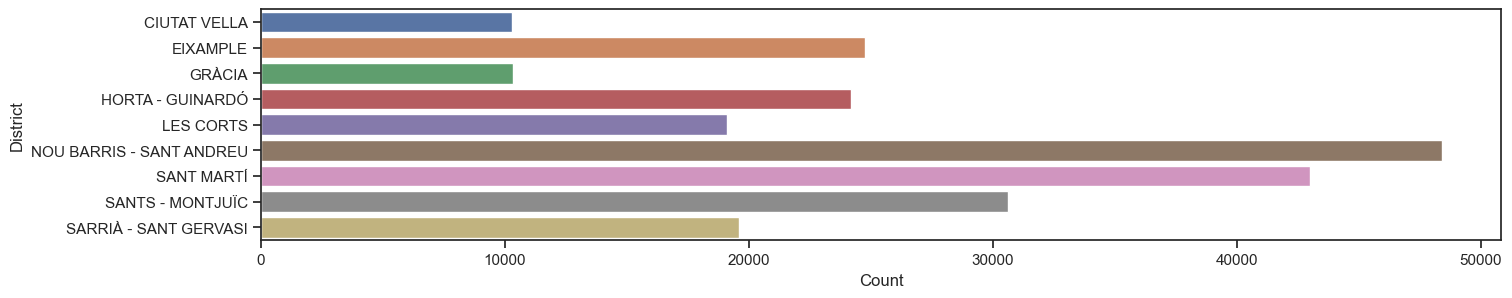

In [19]:
sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(16, 3))

sns.barplot(y = trees_by_district['DISTRICT'],
            x = trees_by_district['ID'],
            ax=ax)

plt.xticks(rotation=0)  # Ya que ahora el eje x representa las etiquetas de los distritos
plt.xlabel('Count')    # Cambiamos la etiqueta del eje x a 'Count'
plt.ylabel('District')

plt.xticks (rotation = 0)

# Agruparé la cantidad de árboles.
- L: Low
- M: Moderate
- H: High
- EH: Extremely High

In [20]:
# Create 4 bins
bins = [10000, 20000, 30000, 40000, 50000] 
labels = ['Low', 'Moderate', 'High', 'Extremely High']  

# Cut
trees_by_district['ID'] = pd.cut(trees_by_district['ID'], bins=bins, labels=labels)

In [21]:
trees_by_district

,DISTRICT,ID
0,CIUTAT VELLA,Low
1,EIXAMPLE,Moderate
2,GRÀCIA,Low
3,HORTA - GUINARDÓ,Moderate
4,LES CORTS,Low
5,NOU BARRIS - SANT ANDREU,Extremely High
6,SANT MARTÍ,Extremely High
7,SANTS - MONTJUÏC,High
8,SARRIÀ - SANT GERVASI,Low


In [22]:
trees_by_district.to_csv ('trees_by_district.csv', index = False)